## Step 1. Importing data

In [2]:
# read_csv function

import os
import pandas as pd
folder_name = 'Fibrazo'
dir = r'C:\Users\mcaba\OneDrive\Escritorio\Data Science\Company test\Company-test\{}'.format(folder_name)

def read_csv_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_csv('{}.csv'.format(file_name), sep=',', low_memory=False, on_bad_lines='skip')
    return df

df_clients = read_csv_fun('Fibrazo','clients', dir)
print(df_clients.head(5))

      id  gaiia_id         status gaiia_status          City          name  \
0  54213   57771.0  Instalaciones       ACTIVE  Barranquilla  SANTODOMINGO   
1  69104   71312.0  Instalaciones       ACTIVE  Barranquilla      CARRIZAL   
2  16311   24969.0  Instalaciones    SUSPENDED     Cartagena    VILLA ROSA   
3  68472   70721.0  Instalaciones       ACTIVE  Barranquilla   SANTA MARIA   
4  15285   24147.0  Instalaciones       ACTIVE     Cartagena    VILLA ROSA   

                created_at  
0  2025-01-14 12:10:45.000  
1  2025-03-12 17:00:00.000  
2  2024-06-06 14:51:15.000  
3  2025-03-10 17:00:00.000  
4  2024-05-27 21:21:40.000  


In [3]:
df_client_journey = read_csv_fun('Fibrazo','client_journey', dir)
print(df_client_journey.head(5))

df_invoices = read_csv_fun('Fibrazo','invoices', dir)
print(df_invoices.head(5))

   gaiia_id                     date          status
0     15332  2023-07-31 05:24:36.783       SUSPENDED
1     17155  2023-07-31 05:24:37.897  SUSPENDED-LEAD
2     16629  2023-07-31 05:24:38.540  SUSPENDED-LEAD
3     16987  2023-07-31 05:24:39.609       SUSPENDED
4     16609  2023-07-31 05:24:40.071       SUSPENDED
      id               created_at  client_id payment_gateway
0  14183  2024-05-01 00:04:24.000       5688           NEQUI
1  14190  2024-05-01 00:07:08.000       8628           NEQUI
2  14180  2024-05-01 00:13:57.000      11289     SUPER_GIROS
3  14184  2024-05-01 00:24:50.000       6757     SUPER_GIROS
4  14185  2024-05-01 00:26:05.000       7607     SUPER_GIROS


## Step 2. Glimpse on the data

In [5]:
display(
    df_clients.head(5)
)

display(
    print(df_clients.isna().sum())
    )

display(
    print(len(df_clients))
    )

display(
    df_clients.info()
)

display(
    df_clients.value_counts("status")
)

display(
    df_clients.value_counts("gaiia_status")
)

display(
    df_clients.value_counts("City")
)

# we have 1 missing gaiia_id on the dataframe
# some columns need to be converted to other Data type for analysis. Ej: created_at      


,id,gaiia_id,status,gaiia_status,City,name,created_at
0,54213,57771.0,Instalaciones,ACTIVE,Barranquilla,SANTODOMINGO,2025-01-14 12:10:45.000
1,69104,71312.0,Instalaciones,ACTIVE,Barranquilla,CARRIZAL,2025-03-12 17:00:00.000
2,16311,24969.0,Instalaciones,SUSPENDED,Cartagena,VILLA ROSA,2024-06-06 14:51:15.000
3,68472,70721.0,Instalaciones,ACTIVE,Barranquilla,SANTA MARIA,2025-03-10 17:00:00.000
4,15285,24147.0,Instalaciones,ACTIVE,Cartagena,VILLA ROSA,2024-05-27 21:21:40.000


id              0
gaiia_id        1
status          0
gaiia_status    0
City            0
name            0
created_at      0
dtype: int64


None

48591


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48591 entries, 0 to 48590
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            48591 non-null  int64  
 1   gaiia_id      48590 non-null  float64
 2   status        48591 non-null  object 
 3   gaiia_status  48591 non-null  object 
 4   City          48591 non-null  object 
 5   name          48591 non-null  object 
 6   created_at    48591 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.6+ MB


None

status
Instalaciones    48298
Ventas             293
dtype: int64

gaiia_status
ACTIVE       30012
SUSPENDED    12109
INACTIVE      6118
PENDING        352
dtype: int64

City
Cartagena       36771
Barranquilla    11820
dtype: int64

In [6]:
## Is id a primary key?

df_clients = df_clients.sort_values(by="id", ascending=True)

# Check 1: Uniqueness of `id`
is_unique = df_clients["id"].is_unique
print(f"Is `id` unique? {is_unique}")

# Check 2: Non-Null Values in `id`
has_nulls = df_clients["id"].isnull().any()
print(f"Does `id` have null values? {has_nulls}")

# Check 3: Incremental Values in `id`
is_incremental = df_clients["id"].is_monotonic_increasing
print(f"Is `id` incremental? {is_incremental}")

# Check for Duplicates in `id`
duplicates = df_clients[df_clients.duplicated("id", keep=False)]
if not duplicates.empty:
    print("\nDuplicate `id` values found:")
    display(duplicates)
else:
    print("\nNo duplicate `id` values found.")

Is `id` unique? True
Does `id` have null values? False
Is `id` incremental? True

No duplicate `id` values found.


In [7]:
display(
    df_client_journey.head(5)
)

display(
    print(df_client_journey.isna().sum())
    )

display(
    print(len(df_client_journey))
    )

display(
    df_client_journey.info()
)

display(
    df_client_journey.value_counts("status")
)

# some columns need to be converted to other Data type for analysis. Ej: date


,gaiia_id,date,status
0,15332,2023-07-31 05:24:36.783,SUSPENDED
1,17155,2023-07-31 05:24:37.897,SUSPENDED-LEAD
2,16629,2023-07-31 05:24:38.540,SUSPENDED-LEAD
3,16987,2023-07-31 05:24:39.609,SUSPENDED
4,16609,2023-07-31 05:24:40.071,SUSPENDED


gaiia_id    0
date        0
status      0
dtype: int64


None

796867


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796867 entries, 0 to 796866
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   gaiia_id  796867 non-null  int64 
 1   date      796867 non-null  object
 2   status    796867 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.2+ MB


None

status
ACTIVE            397111
SUSPENDED         374609
TRIAL               8608
SUSPENDED-LEAD      5884
INACTIVE            4458
INACTIVE-LEAD       4030
PENDING             2166
LEAD                   1
dtype: int64

In [8]:
## Is gaiia_id a primary key?

df_client_journey = df_client_journey.sort_values(by="gaiia_id", ascending=True)

# Check 1: Uniqueness of `gaiia_id`
is_unique = df_client_journey["gaiia_id"].is_unique
print(f"Is `gaiia_id` unique? {is_unique}")

# Check 2: Non-Null Values in `gaiia_id`
has_nulls = df_client_journey["gaiia_id"].isnull().any()
print(f"Does `gaiia_id` have null values? {has_nulls}")

# Check 3: Incremental Values in `gaiia_id`
is_incremental = df_client_journey["gaiia_id"].is_monotonic_increasing
print(f"Is `gaiia_id` incremental? {is_incremental}")

# Check for Duplicates in `gaiia_id`
duplicates = df_client_journey[df_client_journey.duplicated("gaiia_id", keep=False)]
if not duplicates.empty:
    print("\nDuplicate `gaiia_id` values found:")
    display(duplicates)
else:
    print("\nNo duplicate `gaiia_id` values found.")

Is `gaiia_id` unique? False
Does `gaiia_id` have null values? False
Is `gaiia_id` incremental? True

Duplicate `gaiia_id` values found:


,gaiia_id,date,status
44883,15001,2024-02-14 14:46:12.312,ACTIVE
23425,15001,2023-11-27 17:20:09.776,SUSPENDED
15065,15001,2023-10-18 22:24:50.994,SUSPENDED
132370,15001,2024-07-17 19:52:49.736,SUSPENDED
132372,15001,2024-07-17 19:54:54.227,ACTIVE
...,...,...,...
796711,67743,2025-03-14 06:04:00.047,SUSPENDED-LEAD
796771,67748,2025-03-14 06:04:21.842,SUSPENDED-LEAD
751361,67748,2025-02-26 20:11:30.845,TRIAL
751507,67846,2025-02-26 21:01:42.388,TRIAL


In [9]:
display(
    df_invoices.head(5)
)

display(
    print(df_invoices.isna().sum())
    )

display(
    print(len(df_invoices))
    )

display(
    df_invoices.info()
)

display(
    df_invoices.value_counts("payment_gateway")
)

# some columns need to be converted to other Data type for analysis. Ej: created_at

,id,created_at,client_id,payment_gateway
0,14183,2024-05-01 00:04:24.000,5688,NEQUI
1,14190,2024-05-01 00:07:08.000,8628,NEQUI
2,14180,2024-05-01 00:13:57.000,11289,SUPER_GIROS
3,14184,2024-05-01 00:24:50.000,6757,SUPER_GIROS
4,14185,2024-05-01 00:26:05.000,7607,SUPER_GIROS


id                 0
created_at         0
client_id          0
payment_gateway    0
dtype: int64


None

424464


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424464 entries, 0 to 424463
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               424464 non-null  int64 
 1   created_at       424464 non-null  object
 2   client_id        424464 non-null  int64 
 3   payment_gateway  424464 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.0+ MB


None

payment_gateway
NEQUI                    397146
SUPER_GIROS               22355
MERCADO_PAGO_TRANSFER      2726
GIFT                       1949
PAYVALIDA_TRANSFER          288
dtype: int64

In [10]:
## Is id a primary key?

df_invoices = df_invoices.sort_values(by="id", ascending=True)

# Check 1: Uniqueness of `id`
is_unique = df_invoices["id"].is_unique
print(f"Is `id` unique? {is_unique}")

# Check 2: Non-Null Values in `id`
has_nulls = df_invoices["id"].isnull().any()
print(f"Does `id` have null values? {has_nulls}")

# Check 3: Incremental Values in `id`
is_incremental = df_invoices["id"].is_monotonic_increasing
print(f"Is `id` incremental? {is_incremental}")

# Check for Duplicates in `id`
duplicates = df_invoices[df_invoices.duplicated("id", keep=False)]
if not duplicates.empty:
    print("\nDuplicate `id` values found:")
    display(duplicates)
else:
    print("\nNo duplicate `id` values found.")

Is `id` unique? True
Does `id` have null values? False
Is `id` incremental? True

No duplicate `id` values found.


## Step 3. Cleaning Data

In [11]:
#Dropping missing values
threshold = len(df_clients) * 0.05
print(threshold)

cols_to_drop = df_clients.columns[df_clients.isna().sum() <= threshold]
print(cols_to_drop)

df_clients.dropna(subset=cols_to_drop, inplace=True)

#Seems to be just one register, and without this field, 
# it is not possible to perform all the intended joins, 
# the goal is to find trends in the data, 
# so it is convenient to drop the only missing one

2429.55
Index(['id', 'gaiia_id', 'status', 'gaiia_status', 'City', 'name',
       'created_at'],
      dtype='object')


In [12]:
display(
    print(df_clients.isna().sum())
    )

display(
    print(len(df_clients))
    )

id              0
gaiia_id        0
status          0
gaiia_status    0
City            0
name            0
created_at      0
dtype: int64


None

48590


None

In [13]:
#Transforming data columns into the correct Dtype to be able to perform date-time analysis

df_clients["created_at"] = pd.to_datetime(df_clients["created_at"])

df_client_journey["date"] = pd.to_datetime(df_client_journey["date"])

df_invoices["created_at"] = pd.to_datetime(df_invoices["created_at"])

In [14]:
display(
    df_clients.info()
)

display(
    df_client_journey.info()
)

display(
    df_invoices.info()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48590 entries, 42832 to 2280
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            48590 non-null  int64         
 1   gaiia_id      48590 non-null  float64       
 2   status        48590 non-null  object        
 3   gaiia_status  48590 non-null  object        
 4   City          48590 non-null  object        
 5   name          48590 non-null  object        
 6   created_at    48590 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 3.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796867 entries, 44883 to 794440
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   gaiia_id  796867 non-null  int64         
 1   date      796867 non-null  datetime64[ns]
 2   status    796867 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 24.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424464 entries, 888 to 424463
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               424464 non-null  int64         
 1   created_at       424464 non-null  datetime64[ns]
 2   client_id        424464 non-null  int64         
 3   payment_gateway  424464 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 16.2+ MB


None

In [16]:
min_date = df_clients["created_at"].min()
max_date = df_clients["created_at"].max()
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

df_clients["year"] = df_clients["created_at"].dt.year

display(
    df_clients.value_counts("year")
)

# we seem to have two records with time outlyers
# records make sense to be between 2023-2025
# 1996 and 1964 are way back before company creation, this is inconsistent data

Minimum Date: 1964-07-20 10:50:09
Maximum Date: 2025-03-13 22:40:11


year
2024    32249
2025    12009
2023     4330
1964        1
1996        1
dtype: int64

In [17]:
min_date = df_client_journey["date"].min()
max_date = df_client_journey["date"].max()
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

df_client_journey["year"] = df_client_journey["date"].dt.year

display(
    df_client_journey.value_counts("year")
)

# records make sense to be between 2023-2025

Minimum Date: 2023-07-31 05:24:36.783000
Maximum Date: 2025-03-14 06:06:59.163000


year
2024    460823
2025    304603
2023     31441
dtype: int64

In [18]:
min_date = df_invoices["created_at"].min()
max_date = df_invoices["created_at"].max()
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

df_invoices["year"] = df_invoices["created_at"].dt.year

display(
    df_invoices.value_counts("year")
)

# records are available between 2024-2025 this may limit our scope of analysis
# to provide a clear trend using payment_gateway info

Minimum Date: 2024-05-01 00:04:24
Maximum Date: 2025-03-14 15:35:06


year
2024    227619
2025    196845
dtype: int64

In [19]:
# On this case the most reasonable thing to do is to drop inconsistent date data 
# since there is only one created_at per client id, there is no other way to imput it
# also this are only two rows of data, 0.004% of df_clients

outliers = df_clients[df_clients["created_at"].dt.year.isin([1996, 1964])]
print(outliers)

df_clients = df_clients[~df_clients["created_at"].dt.year.isin([1996, 1964])]


         id  gaiia_id         status gaiia_status       City  \
38938  4794   16910.0  Instalaciones     INACTIVE  Cartagena   
39631  5634   17750.0  Instalaciones     INACTIVE  Cartagena   

                   name          created_at  year  
38938  UB NUEVA VENECIA 1996-11-28 16:34:09  1996  
39631     LA CANDELARIA 1964-07-20 10:50:09  1964  


In [20]:
display(
    df_clients.value_counts("year")
)

year
2024    32249
2025    12009
2023     4330
dtype: int64

In [21]:
print(df_client_journey[df_client_journey["gaiia_id"] == 15103].value_counts("status"))

status
ACTIVE       11
SUSPENDED    10
INACTIVE      1
PENDING       1
dtype: int64


## Step 4. Feature Engineering

In [22]:
# Create the churned column
df_client_journey["churned"] = df_client_journey["status"].apply(
    lambda x: 1 if x in ["SUSPENDED", "INACTIVE"] else 0
)

# Display the updated DataFrame
print(df_client_journey.head())

        gaiia_id                    date     status  year  churned
44883      15001 2024-02-14 14:46:12.312     ACTIVE  2024        0
23425      15001 2023-11-27 17:20:09.776  SUSPENDED  2023        1
15065      15001 2023-10-18 22:24:50.994  SUSPENDED  2023        1
132370     15001 2024-07-17 19:52:49.736  SUSPENDED  2024        1
132372     15001 2024-07-17 19:54:54.227     ACTIVE  2024        0


In [ ]:
# Function to calculate subscription duration for each client
def calculate_subscription_duration(group):
    # Sort by date
    group = group.sort_values(by="date")
    
    # Initialize list to store durations
    durations = []
    
    # Iterate through the group to calculate durations
    for i in range(len(group)):
        if group.iloc[i]["status"] == "ACTIVE":
            # Find the closest SUSPENDED or INACTIVE event after this ACTIVE event
            for j in range(i + 1, len(group)):
                if group.iloc[j]["status"] in ["SUSPENDED", "INACTIVE"]:
                    duration = (group.iloc[j]["date"] - group.iloc[i]["date"]).days
                    durations.append((group.iloc[i]["date"], duration))
                    break  # Stop after finding the closest event
    
    # Convert the result to a DataFrame
    durations_df = pd.DataFrame(durations, columns=["active_date", "subscription_duration"])
    return durations_df

# Apply the function to each client
subscription_durations = df_client_journey.groupby("gaiia_id").apply(calculate_subscription_duration).reset_index(drop=True)

# Merge subscription durations with df_client_journey
df_client_journey = df_client_journey.merge(
    subscription_durations,
    left_on=["gaiia_id", "date"],
    right_on=["gaiia_id", "active_date"],
    how="left"
)

# Drop the temporary active_date column
df_client_journey = df_client_journey.drop(columns=["active_date"])

# Display the updated DataFrame
print(df_client_journey.head())

In [247]:
# Merge subscription durations with df_client_journey
df_client_journey = df_client_journey.merge(
    subscription_durations,
    left_on=["gaiia_id", "date"],
    right_on=["gaiia_id", "active_date"],
    how="left"
)

# Drop the temporary active_date column
df_client_journey = df_client_journey.drop(columns=["active_date"])

# Display the updated DataFrame
print(df_client_journey.head())

KeyError: 'gaiia_id'

In [232]:
# Filter for a specific client
client_data = df_client_journey[df_client_journey["gaiia_id"] == 15103]

# Display the client's data
print(client_data[["gaiia_id", "date", "status", "churned", "subscription_duration"]])

        gaiia_id                    date     status  churned  \
222939     15103 2024-06-04 13:19:13.952     ACTIVE        0   
222940     15103 2024-06-04 13:19:13.952     ACTIVE        0   
222941     15103 2024-06-04 13:19:13.952     ACTIVE        0   
222942     15103 2024-06-04 13:19:13.952     ACTIVE        0   
222943     15103 2024-06-04 13:19:13.952     ACTIVE        0   
...          ...                     ...        ...      ...   
223164     15103 2024-04-03 03:04:00.691  SUSPENDED        1   
223165     15103 2024-04-03 03:04:00.691  SUSPENDED        1   
223166     15103 2024-04-03 03:04:00.691  SUSPENDED        1   
223167     15103 2024-04-03 03:04:00.691  SUSPENDED        1   
223168     15103 2024-04-03 03:04:00.691  SUSPENDED        1   

       subscription_duration  
222939                    30  
222940                     6  
222941                     7  
222942                    61  
222943                    30  
...                      ...  
223164        

In [205]:
# First lets join the data
# Perform inner join on gaiia_id (df_clients + df_client_journey)
df_merged = pd.merge(
    df_clients,
    df_client_journey,
    on="gaiia_id",
    how="inner",
    suffixes=("_client", "_journey")
)
# Display the merged DataFrame
display(df_merged.head(2))

,id,gaiia_id,status_client,gaiia_status,City,name,created_at,year_client,date,status_journey,year_journey
0,84,15103.0,Instalaciones,ACTIVE,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,2023-03-02 15:35:24,2023,2024-06-04 13:19:13.952,ACTIVE,2024
1,84,15103.0,Instalaciones,ACTIVE,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,2023-03-02 15:35:24,2023,2024-03-26 15:03:58.924,SUSPENDED,2024


In [206]:
# Perform inner join on client_id (df_merged + df_invoice)
df_data = pd.merge(
    df_merged,
    df_invoices,
    left_on="id",  
    right_on="client_id", 
    how="inner",
    suffixes=("_client", "_invoice")
)

display(df_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028143 entries, 0 to 27028142
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id_client           int64         
 1   gaiia_id            float64       
 2   status_client       object        
 3   gaiia_status        object        
 4   City                object        
 5   name                object        
 6   created_at_client   datetime64[ns]
 7   year_client         int64         
 8   date                datetime64[ns]
 9   status_journey      object        
 10  year_journey        int64         
 11  id_invoice          int64         
 12  created_at_invoice  datetime64[ns]
 13  client_id           int64         
 14  payment_gateway     object        
 15  year                int64         
dtypes: datetime64[ns](3), float64(1), int64(6), object(6)
memory usage: 3.4+ GB


None

In [207]:
print(df_data["id_client"].unique())

[   84    88    89 ... 66910 67149 67174]


In [223]:
print(df_data[df_data["id_client"] == 84].value_counts("date"))

date
2023-08-03 23:37:38.510    12
2024-07-05 03:17:01.569    12
2025-03-01 03:03:55.990    12
2025-02-17 22:18:54.728    12
2025-02-14 21:04:23.662    12
2025-01-14 22:26:46.176    12
2025-01-14 13:03:49.135    12
2024-11-07 13:26:07.616    12
2024-11-06 12:04:11.628    12
2024-08-06 01:34:58.059    12
2024-08-04 18:06:46.202    12
2024-07-05 02:05:42.340    12
2023-09-03 08:04:43.124    12
2024-06-04 13:19:13.952    12
2024-06-03 22:04:41.683    12
2024-04-03 12:44:10.620    12
2024-04-03 03:04:00.691    12
2024-03-26 21:41:00.308    12
2024-03-26 15:03:58.924    12
2024-03-20 14:09:32.121    12
2024-03-14 15:49:31.330    12
2023-11-02 17:39:31.201    12
2025-03-03 20:00:36.036    12
dtype: int64


In [226]:
print(df_client_journey[df_client_journey["gaiia_id"] == 15103].value_counts("status"))

status
ACTIVE       11
SUSPENDED    10
INACTIVE      1
PENDING       1
dtype: int64


In [ ]:
# Churn
df_data["churned"] = df_data.groupby("id_client")["status_journey"].transform(
    lambda x: 1 if (x.isin(["SUSPENDED", "INACTIVE"]).sum() > 0) else 0
)

ValueError: Function did not transform

In [ ]:
# Churn


In [ ]:
# New Clients


In [ ]:
## Time-features

df_clients["year"] = df_clients["created_at"].dt.year
df_clients["month"] = df_clients["created_at"].dt.month
df_clients["weekday"] = df_clients["created_at"].dt.weekday

df_clients["week_number"] = df_clients["created_at"].dt.isocalendar().week

# Create 'year_week' column by concatenating year and week number
df_clients["year_week"] = df_clients["year"].astype(str) + "_" + df_clients["week_number"].astype(str)

display(
    df_clients.info()
)

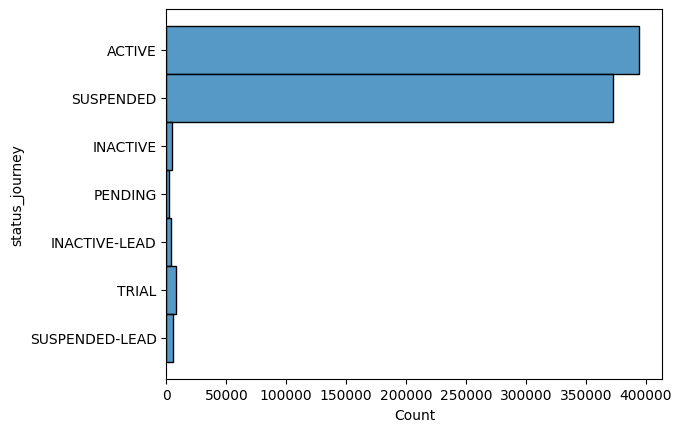

In [122]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=df_merged, y="status_journey", binwidth=1)
plt.show()

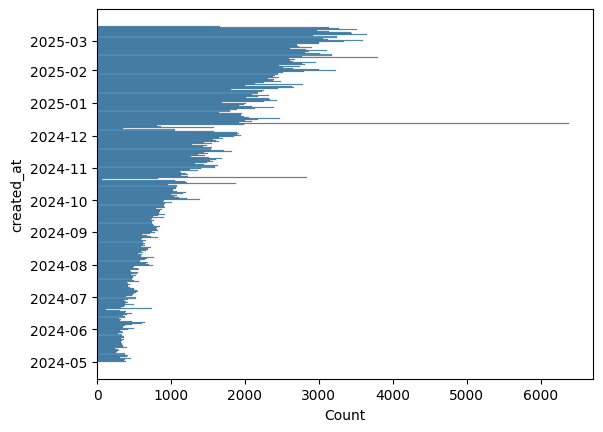

In [123]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=df_invoices, y="payment_gateway", binwidth=1)
plt.show()

In [129]:
print(
    df_invoices.head(5)
)
display(
    df_invoices.info()
)
display(
    df_invoices.value_counts("payment_gateway")
)


         id          created_at  client_id payment_gateway  year
888   13723 2024-05-03 13:04:19      11633           NEQUI  2024
1175  13929 2024-05-04 00:42:57       5862           NEQUI  2024
938   14032 2024-05-03 15:56:42      11855           NEQUI  2024
1006  14077 2024-05-03 18:28:38       6989           NEQUI  2024
2     14180 2024-05-01 00:13:57      11289     SUPER_GIROS  2024
<class 'pandas.core.frame.DataFrame'>
Int64Index: 424464 entries, 888 to 424463
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               424464 non-null  int64         
 1   created_at       424464 non-null  datetime64[ns]
 2   client_id        424464 non-null  int64         
 3   payment_gateway  424464 non-null  object        
 4   year             424464 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 19.4+ MB


None

payment_gateway
NEQUI                    397146
SUPER_GIROS               22355
MERCADO_PAGO_TRANSFER      2726
GIFT                       1949
PAYVALIDA_TRANSFER          288
dtype: int64